In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.models import load_model

model_name = 'met_bottle_model0826_v3.h5'

#model がこのフォルダ層で保存されているから、このjnpyデータ移動させると読み込めなくなるち
model = load_model(model_name)
model.summary()  # As a reminder.

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 82, 82, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 17, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)            

/home/kazuki/anaconda3/envs/keras_py36/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(84, 84, 1)
(1, 84, 84, 1)


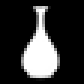

In [3]:
import os

base_path = '/home/kazuki/Documents/myWork/DataSet/Met_Bottle_DataSet0826/test/god/'
img_name = '0037' + '.png'
img_path= os.path.join(base_path,img_name)

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, grayscale=True, color_mode = "grayscale", target_size=(84, 84))

img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)
img

In [4]:
from keras import models
layers_num = len(model.layers)
print(len(model.layers))


# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:9]]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

9


In [5]:
predict_proba = model.predict_proba(img_tensor)[0]
predict_class = model.predict_classes(img_tensor)[0]

print(predict_proba)
print(predict_class)


Instructions for updating:
Please use `model.predict()` instead.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0.64710176]
[1]


In [6]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 82, 82, 32)


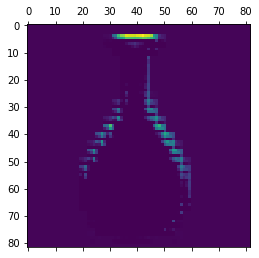

In [7]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

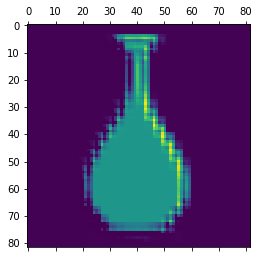

In [8]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

MemoryError: Unable to allocate 4.00 TiB for an array with shape (4194304, 131072) and data type float64

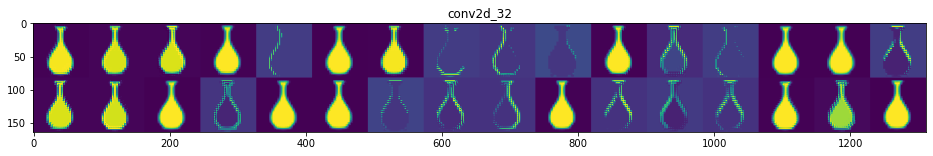

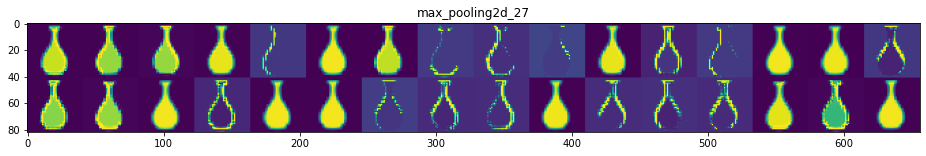

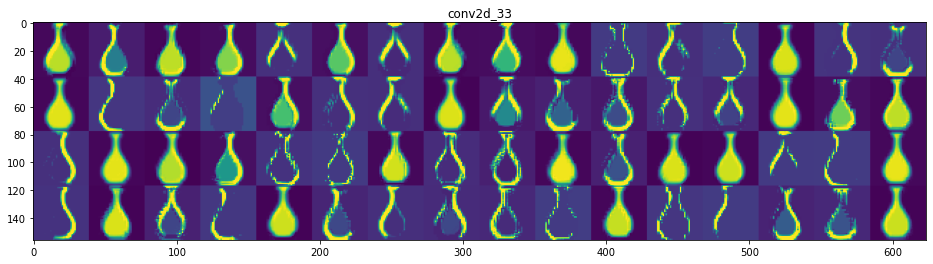

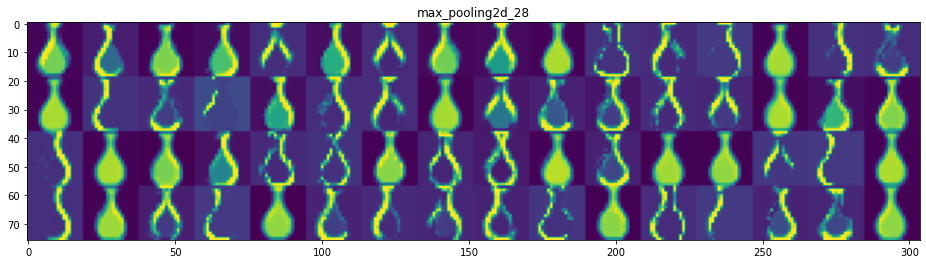

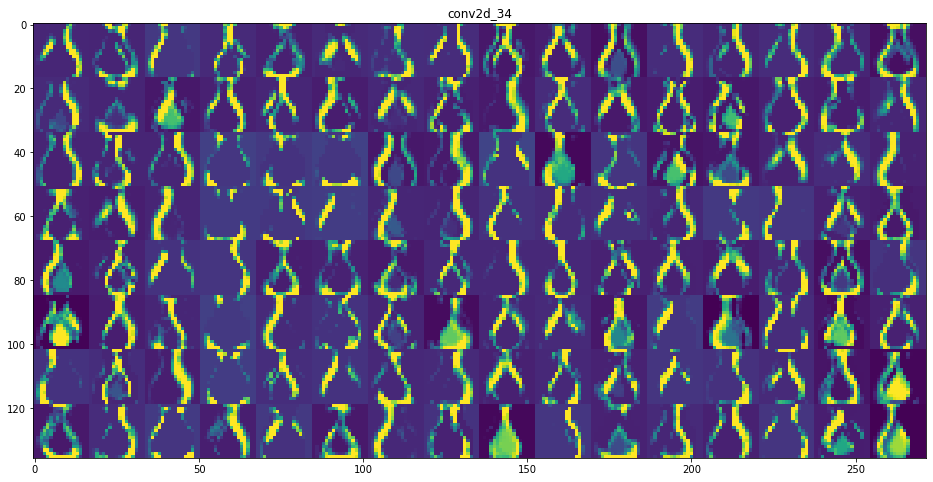

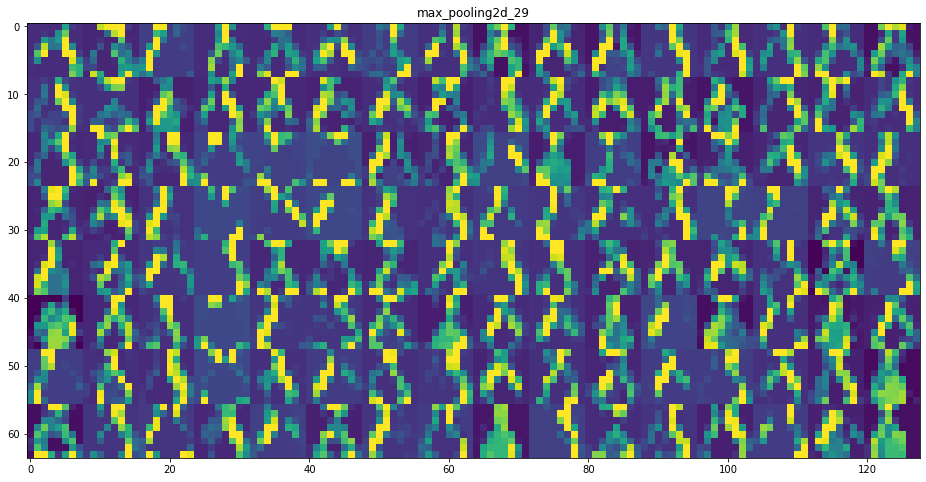

In [9]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()